In [ ]:
!pip install watermark
!pip install nicaviz

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nicaviz
import seaborn as sns
import time
import matplotlib.pyplot as plt
import itertools
import glob
import re
import math

sns.set_style("whitegrid")

%load_ext watermark
%watermark 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Last updated: 2022-10-10T23:17:18.629647+00:00

Python implementation: CPython
Python version       : 3.7.12
IPython version      : 7.33.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.65+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

/kaggle/input/nfl-big-data-bowl-2023/players.csv
/kaggle/input/nfl-big-data-bowl-2023/week6.csv
/kaggle/input/nfl-big-data-bowl-2023/week2.csv
/kaggle/input/nfl-big-data-bowl-2023/pffScoutingData.csv
/kaggle/input/nfl-big-data-bowl-2023/week3.csv
/kaggle/input/nfl-big-data-bowl-2023/week8.csv
/kaggle/input/nfl-big-data-bowl-2023/games.csv
/kaggle/input/nfl-big-data-bowl-2023/week5.csv
/kaggle/input/nfl-big-data-bowl-2023/week7.csv
/kaggle/input/nfl-big-data-bowl-2023/week1.csv
/kaggle/input/nfl-big-data-bowl-2023/week4.csv
/kaggle/input/nfl-big-data-bowl-2023/plays.csv


In [ ]:
#Code by Nick Brooks https://www.kaggle.com/nicapotato/ventilator-pressure-prediction-nicaviz-eda/notebook

#Tracking 2020

track20 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/week4.csv")


display(track20.head())
display(track20.nica.categorical_describe())

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021093000,169,38696.0,1,2021-10-01 00:29:42,11.0,JAX,right,54.66,44.66,0.0,0.0,0.0,107.61,134.74,None
1,2021093000,169,38696.0,2,2021-10-01 00:29:42,11.0,JAX,right,54.66,44.66,0.0,0.0,0.0,107.61,130.79,None
2,2021093000,169,38696.0,3,2021-10-01 00:29:43,11.0,JAX,right,54.66,44.67,0.0,0.0,0.0,107.61,122.78,None
3,2021093000,169,38696.0,4,2021-10-01 00:29:43,11.0,JAX,right,54.66,44.66,0.0,0.0,0.0,107.61,134.78,None
4,2021093000,169,38696.0,5,2021-10-01 00:29:43,11.0,JAX,right,54.66,44.66,0.0,0.0,0.0,107.61,130.76,None


Dataframe Dimension: 1074606 Rows, 16 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
gameId,16,0,int64,2021100307,83605,2021100300,78407,2021100311,78177.0,2021100313,76613.0,2021100309,73048.0
playId,987,0,int64,2505,4922,198,3611,4138,3381.0,3206,3266.0,3331,2921.0
nflId,1174,46722,float64,40124.0,2211,41243.0,2211,52566.0,2211.0,38538.0,2211.0,47865.0,2211.0
frameId,119,0,int64,1,25599,13,25599,22,25599.0,21,25599.0,20,25599.0
time,5197,0,object,2021-10-03 19:38:03,805,2021-10-03 19:38:04,759,2021-10-03 19:48:30,690.0,2021-10-03 18:19:00,690.0,2021-10-03 19:38:02,690.0
jerseyNumber,99,46722,float64,23.0,22465,2.0,19372,26.0,19147.0,76.0,18699.0,97.0,17630.0
team,33,0,object,football,46722,NYJ,39985,TEN,39985.0,ATL,37499.0,WAS,37499.0
playDirection,2,0,object,left,553725,right,520881,NaN,NaN,NaN,NaN,NaN,NaN
x,11870,0,float64,48.49,205,48.5,202,35.28,199.0,54.66,197.0,45.57,197.0


In [ ]:
players = pd.read_csv('../input/nfl-big-data-bowl-2023/players.csv')
players.head()

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


In [ ]:
games = pd.read_csv('../input/nfl-big-data-bowl-2023/games.csv')
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


In [ ]:
pff = pd.read_csv('../input/nfl-big-data-bowl-2023/pffScoutingData.csv')
pff.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0


#Time Series

In [ ]:
players['birthDate'] = pd.to_datetime(players['birthDate'])

In [ ]:
games['gameDate'] = pd.to_datetime(games['gameDate'])

#Interval 1day (Players file)

[Timeserie Resample Plot] done in 0.0 s


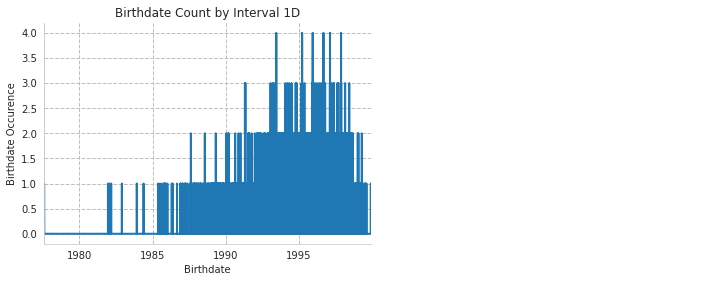

In [ ]:
#Code by Nick Brooks https://www.kaggle.com/nicapotato/covid-digital-learning-data-exploration

with nicaviz.timer("Timeserie Resample Plot"):
    players.nica.mass_plot(
        plt_set= ["birthDate"],
        plottype = "ts_resample",
        resample=True,
        resample_interval="1D"
    )

#Interval 1 Week. (Players file)

[Timeserie Resample Plot] done in 0.0 s


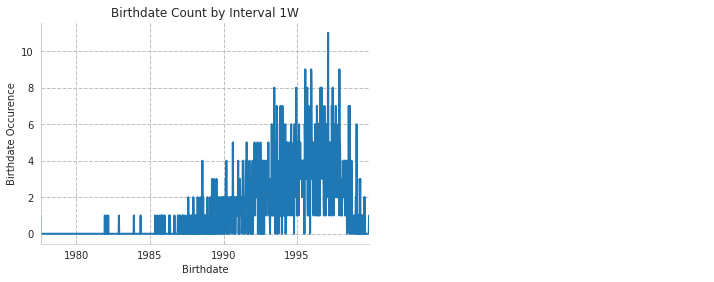

In [ ]:

with nicaviz.timer("Timeserie Resample Plot"):
    players.nica.mass_plot(
        plt_set= ["birthDate"],
        plottype = "ts_resample",
        resample=True,
        resample_interval="1W"
    )

#Interval 1 year (Players file)

[Timeserie Resample Plot] done in 0.0 s


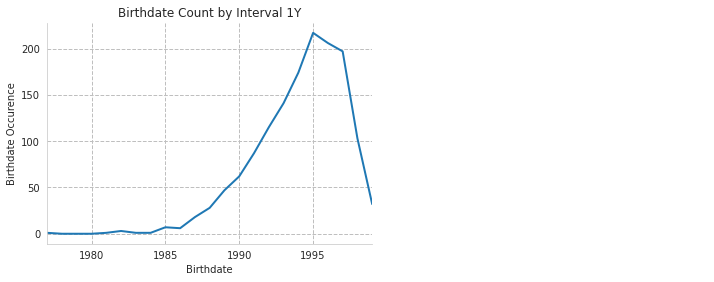

In [ ]:

with nicaviz.timer("Timeserie Resample Plot"):
    players.nica.mass_plot(
        plt_set= ["birthDate"],
        plottype = "ts_resample",
        resample=True,
        resample_interval="1Y"
    )

#Interval 1day (Games file)

[Timeserie Resample Plot] done in 0.0 s


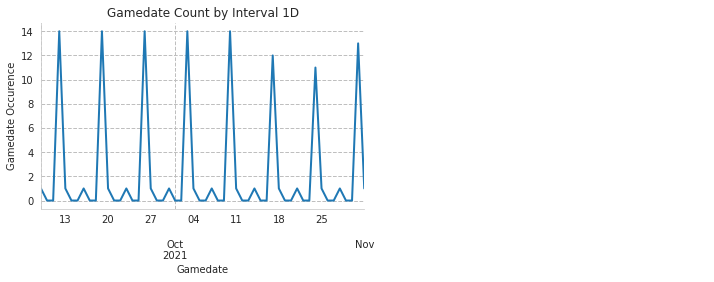

In [ ]:

with nicaviz.timer("Timeserie Resample Plot"):
    games.nica.mass_plot(
        plt_set= ["gameDate"],
        plottype = "ts_resample",
        resample=True,
        resample_interval="1D"
    )

#Interval 1Week (Games file)

[Timeserie Resample Plot] done in 0.0 s


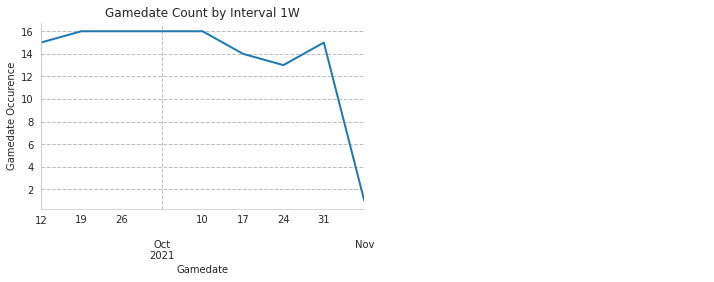

In [ ]:

with nicaviz.timer("Timeserie Resample Plot"):
    games.nica.mass_plot(
        plt_set= ["gameDate"],
        plottype = "ts_resample",
        resample=True,
        resample_interval="1W"
    )

In [ ]:
playersInt = ['nflId', 'weight']

[Timeserie Rolling Plot] done in 0.0 s


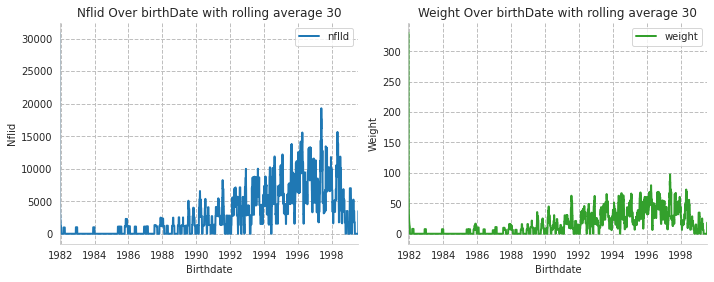

In [ ]:

with nicaviz.timer("Timeserie Rolling Plot"):
    players.sample(500).nica.mass_plot(
        plt_set= playersInt,
        plottype = "ts_rolling",
        x_var="birthDate",
        rolling=True,
        r=30
    )

#Categorical Variables

[Boxplots] done in 0.0 s


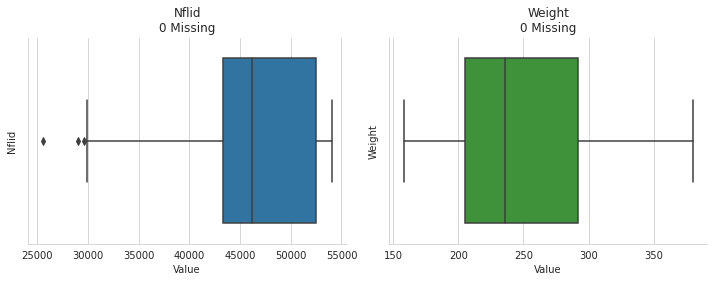

In [ ]:

with nicaviz.timer("Boxplots"):
    players.nica.mass_plot(
        plt_set= playersInt,
        plottype = "boxplot")

[Small Hue Boxplots] done in 44.0 s


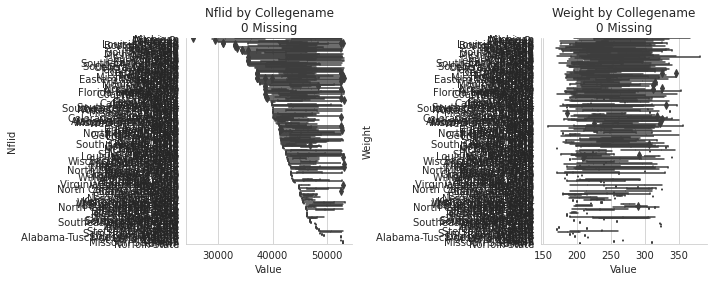

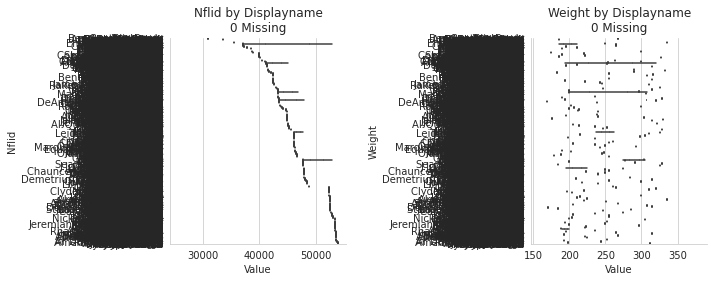

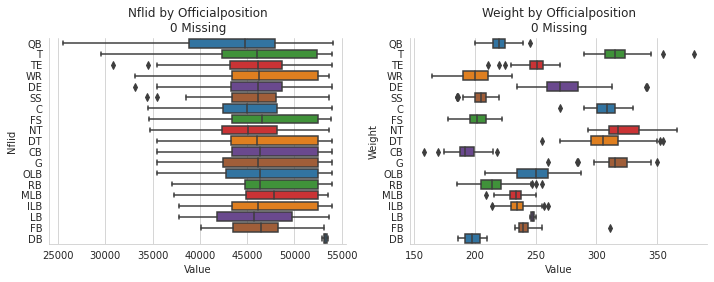

In [ ]:

categoricals = [
    "collegeName",
    "displayName",
    "officialPosition",
        
]

with nicaviz.timer("Small Hue Boxplots"):
    for hue_col in categoricals:
        players.nica.mass_plot(
            plt_set= playersInt,
            hue = hue_col,
            columns = 2,
            plottype = "boxplot")

#Above it's messy

[Wordcloud Plot] done in 10.0 s


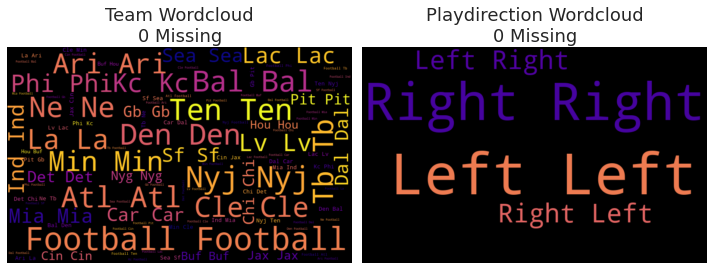

In [ ]:

with nicaviz.timer("Wordcloud Plot"):
    track20.nica.mass_plot(
        plt_set= ["team", "playDirection"],
        plottype = "wordcloud")

[Count Plot] done in 0.0 s


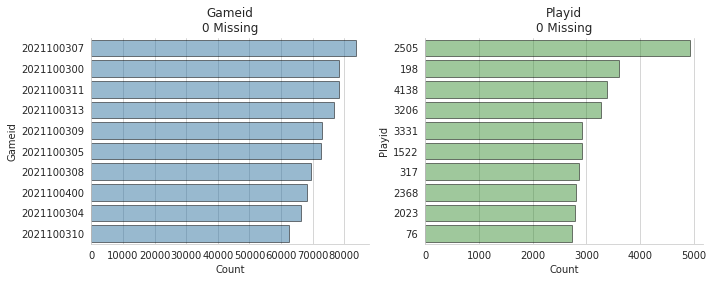

In [ ]:

with nicaviz.timer("Count Plot"):
    track20.nica.mass_plot(
        plt_set= ["gameId", "playId"],
        plottype = "countplot")

[Bar Plot] done in 26.0 s


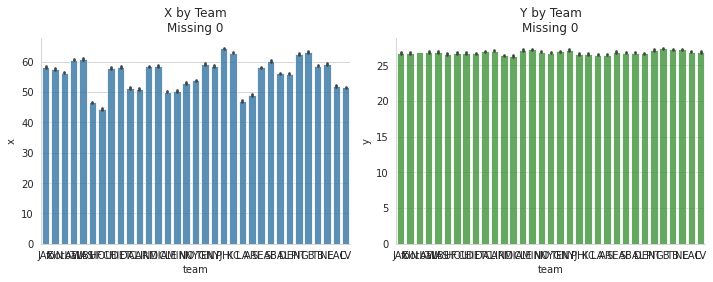

In [ ]:

with nicaviz.timer("Bar Plot"):
    track20.nica.mass_plot(
        plt_set= ["x", "y"],
        x_var = "team",
        plottype = "bar")

[Boxplots] done in 2.0 s


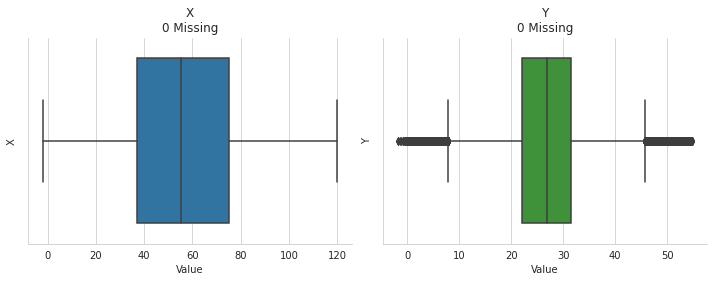

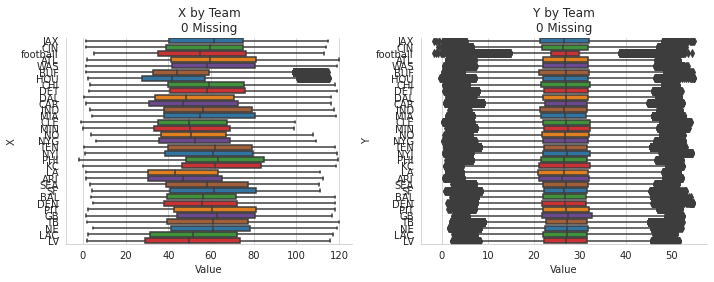

In [ ]:

with nicaviz.timer("Boxplots"):
    track20.nica.mass_plot(
        plt_set= ["x", "y"],
        plottype = "boxplot")

    track20.nica.mass_plot(
        plt_set= ["x", "y"],
        hue = "team",
        plottype = "boxplot")

[Distplots] done in 16.0 s


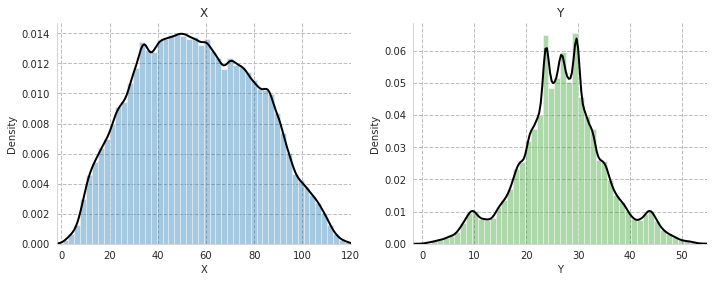

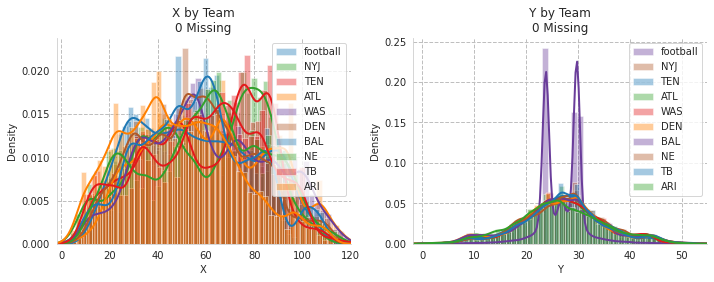

In [ ]:

with nicaviz.timer("Distplots"):
    track20.nica.mass_plot(
        plt_set= ["x", "y"],
        plottype = "distplot")

    track20.nica.mass_plot(
        plt_set= ["x", "y"],
        hue = "team",
        plottype = "distplot")

[Distplots] done in 5.0 s


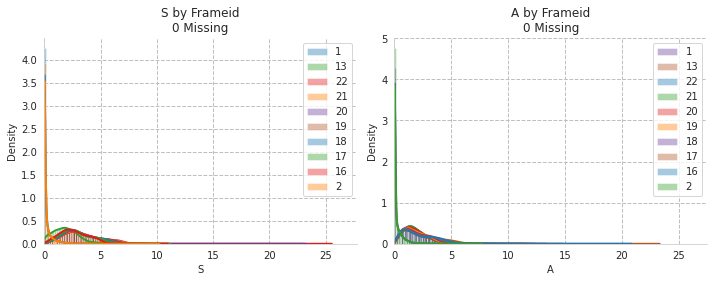

In [ ]:

with nicaviz.timer("Distplots"):
    track20.nica.mass_plot(
        plt_set= ["s", "a"],
        hue = "frameId",
        plottype = "distplot")

[Countplot] done in 1.0 s


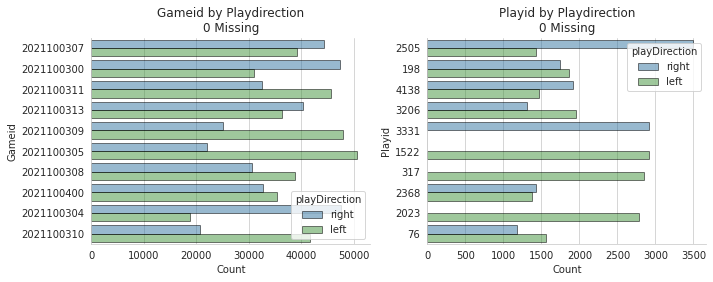

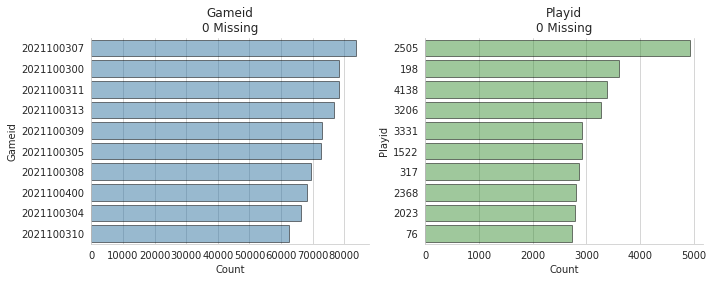

In [ ]:

with nicaviz.timer("Countplot"):
    track20.nica.mass_plot(
        plt_set= ["gameId", "playId"],
        hue = "playDirection",
        plottype = "countplot")

    track20.nica.mass_plot(
        plt_set= ["gameId", "playId"],
        plottype = "countplot")

In [ ]:

categoricals = ["event", "team", "playDirection"]
continuous = ["dir", "nflId", "jerseyNumber"]#Test below with only 3 continuous
integer = ['frameId', 'gameId', 'playId']
timevar = 'time'

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


[Distplots] done in 14.0 s


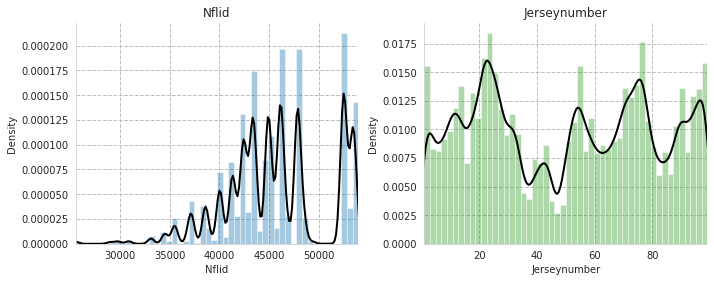

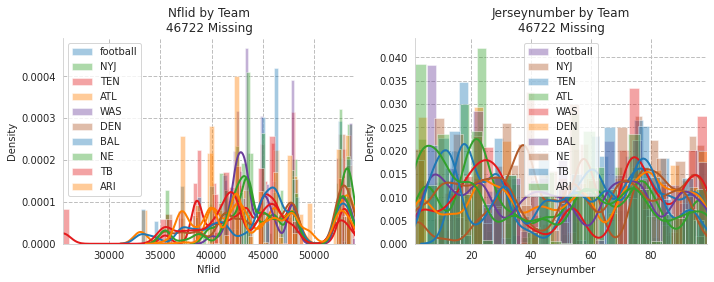

In [ ]:
with nicaviz.timer("Distplots"):
    track20.nica.mass_plot(
        plt_set= ["nflId", "jerseyNumber"],
        plottype = "distplot")

    track20.nica.mass_plot(
        plt_set= ["nflId", "jerseyNumber"],
        hue = "team",
        plottype = "distplot")

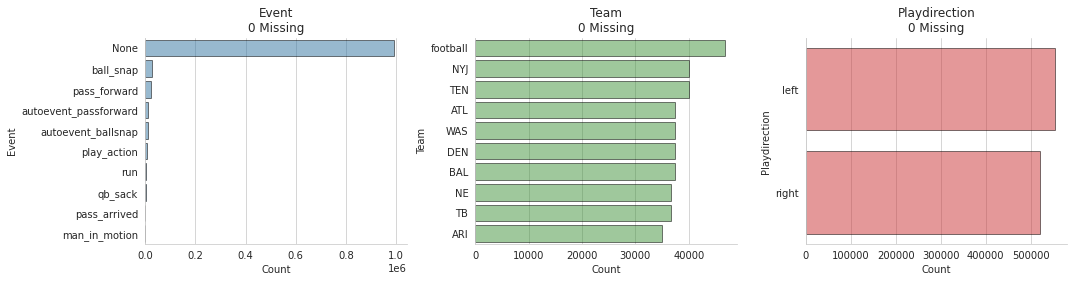

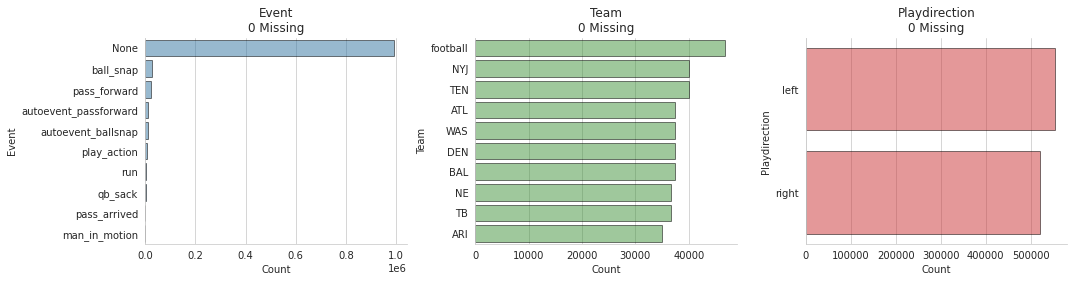

In [ ]:

track20.nica.mass_plot(
    plt_set = categoricals,
    columns = 3,
    plottype = "countplot")

['nflId', 'jerseyNumber'] Correlation: -0.03999143193369454


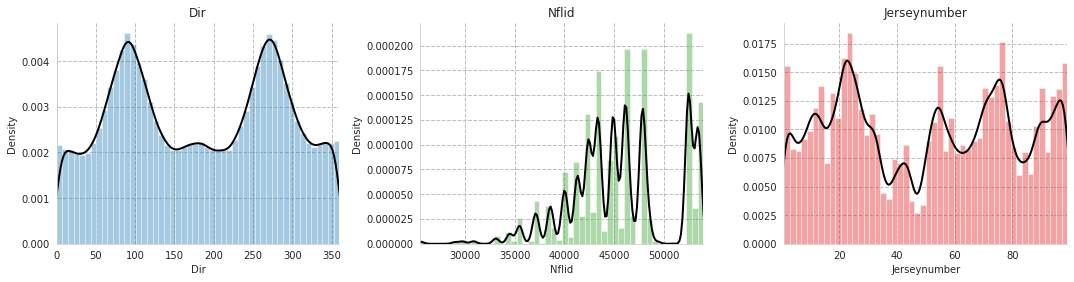

In [ ]:

track20.nica.mass_plot(
    plt_set = continuous,
    columns = 3,
    plottype = "distplot")

print("['nflId', 'jerseyNumber'] Correlation: {}".format(track20[['nflId', 'jerseyNumber']].corr().iloc[0,1]))

#Recommended by Nick using column = 1 for pivot plots if they get crammed.

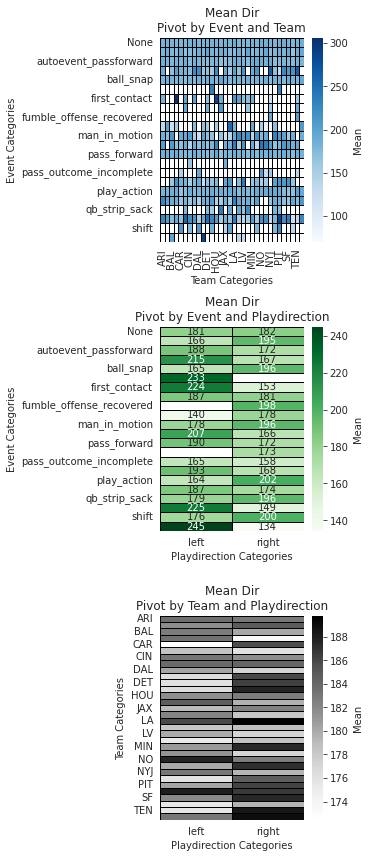

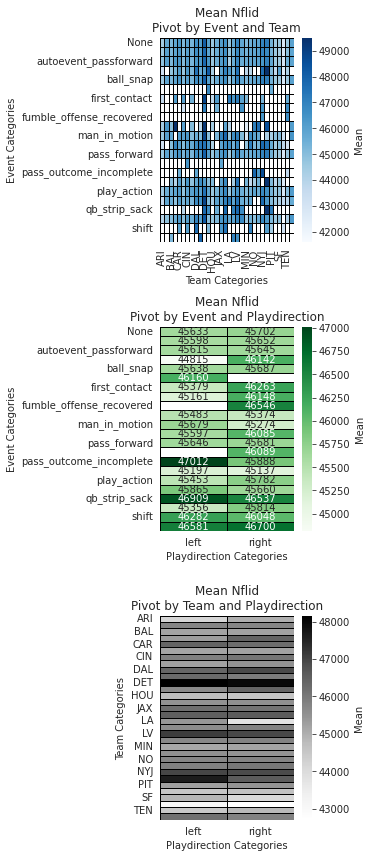

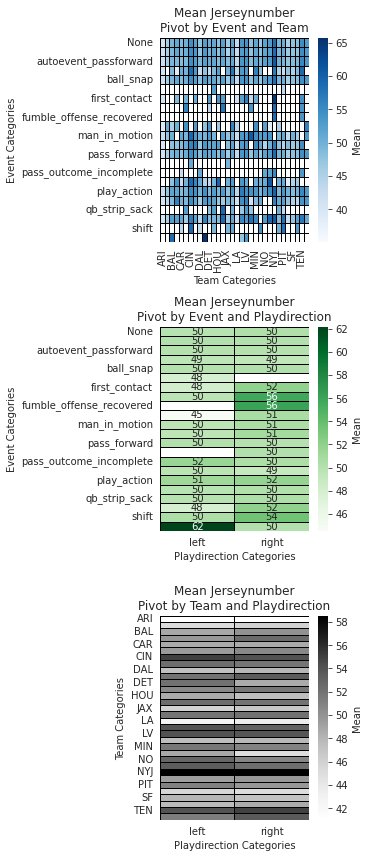

In [ ]:

for cont in continuous:
    track20.nica.pivot_plots(
        categoricalcols = categoricals,
        valuecol = cont,
        aggfunc = np.mean,
        columns = 1)

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


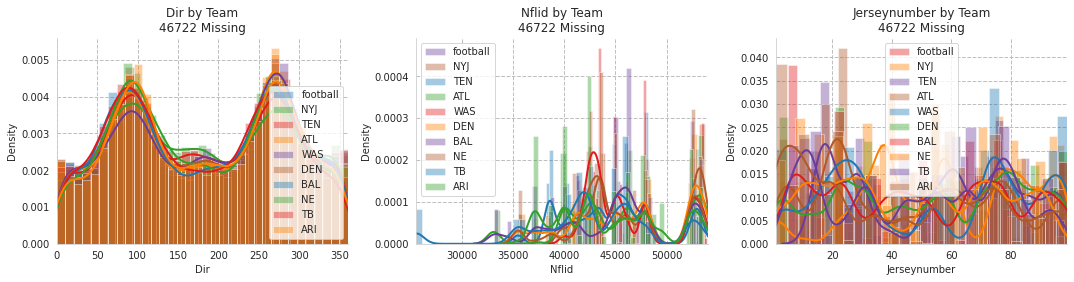

In [ ]:

track20.nica.mass_plot(
    plt_set = continuous,
    columns = 3,
    hue = 'team',
    plottype = "distplot");

/opt/conda/lib/python3.7/site-packages/nicaviz/dataframe_visualizer.py:112: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=1)


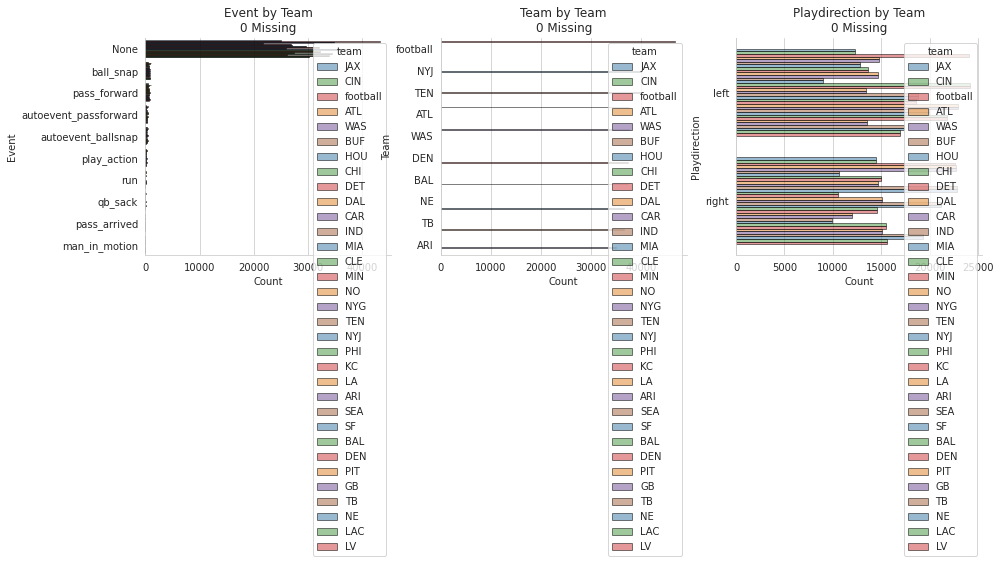

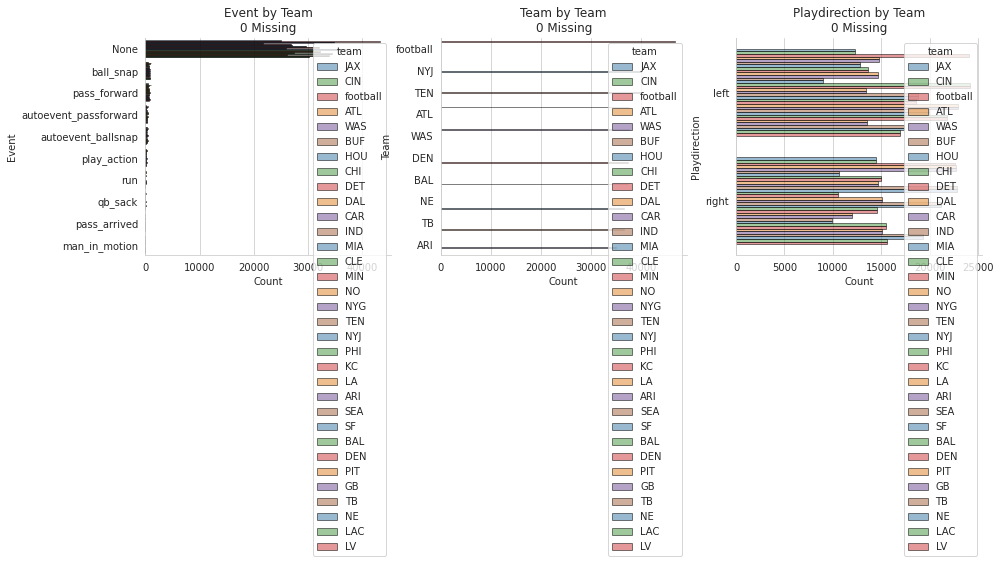

In [ ]:

track20.nica.mass_plot(
    plt_set = ["event", "team", "playDirection"],
    columns = 3,
    hue = 'team',
    plottype = "countplot")

[Correlation Plot] done in 0.0 s


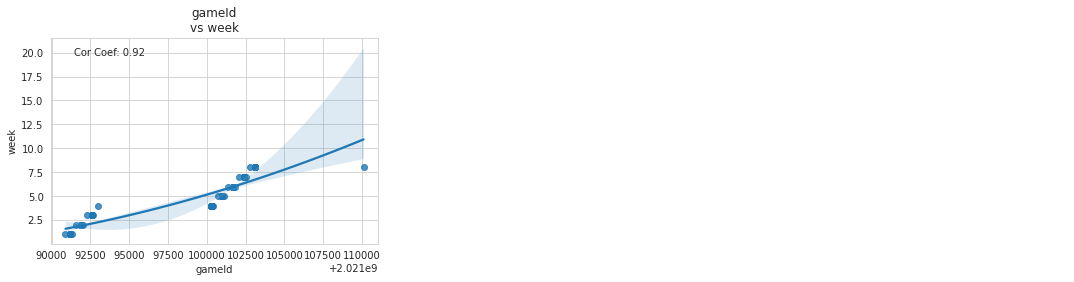

In [ ]:
with nicaviz.timer("Correlation Plot"):
    games.nica.rank_correlations_plots(["season", "gameId", "week"], 9)

[Pivot Heatmap Plot] done in 1.0 s


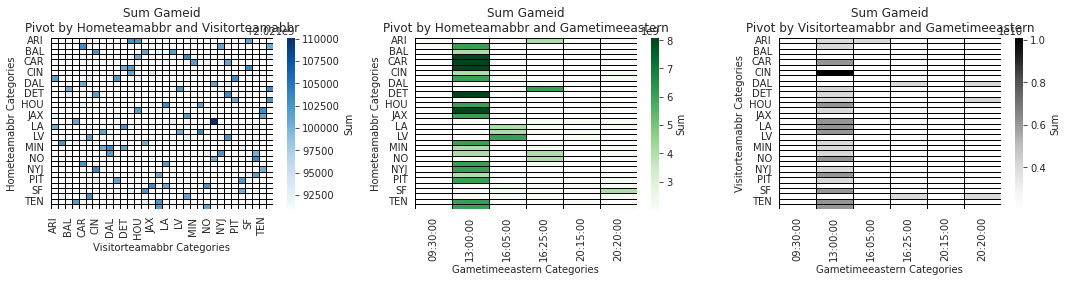

In [ ]:
with nicaviz.timer("Pivot Heatmap Plot"):
    categorical = ['homeTeamAbbr', 'visitorTeamAbbr', 'gameTimeEastern']
    games.nica.pivot_plots(categorical, "gameId", np.sum)

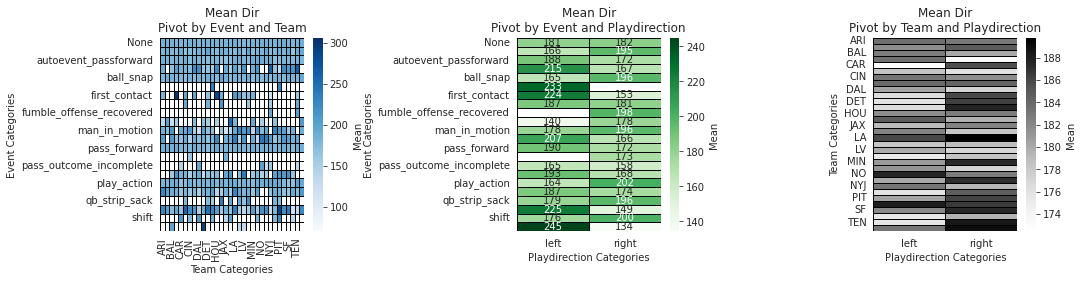

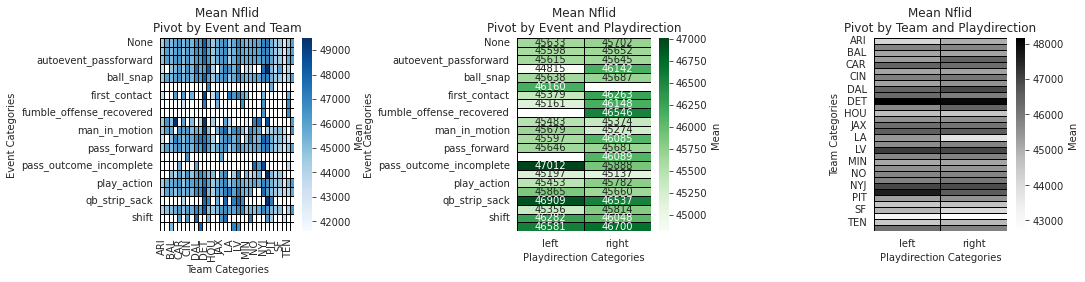

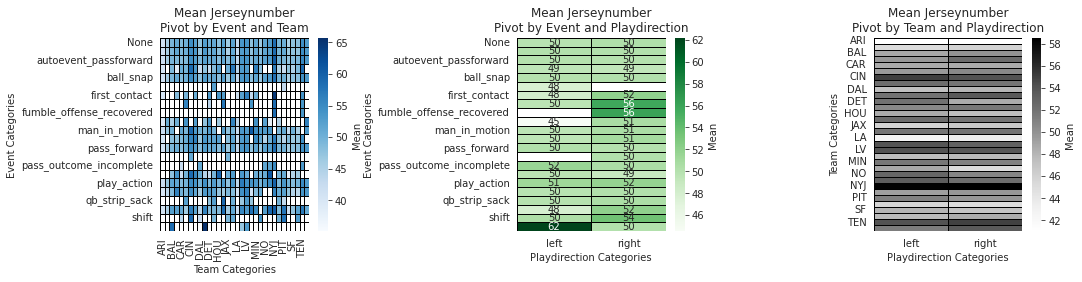

In [ ]:

for cont in continuous:
    track20.nica.pivot_plots(categoricals, cont, np.mean)

In [ ]:
notebookstart = time.time()
%watermark --iversions

matplotlib: 3.5.3
numpy     : 1.21.6
nicaviz   : 0.1.4
seaborn   : 0.11.2
pandas    : 1.3.5
re        : 2.2.1



In [ ]:
print("Notebook Runtime: %0.2f Minutes"%((time.time() - notebookstart)/60))

Notebook Runtime: 0.09 Minutes
